In [2]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Paso 1: Leemos el Dataset

In [3]:
dataset_estadisticas_definitivo = pd.read_csv(r"https://raw.githubusercontent.com/PabloLedo97/Datasets-Master-Big-Data/main/DatasetDefinitivo_Pablo_Ledo.csv",sep=";",encoding='latin-1');
dataset_estadisticas_definitivo

,Equipo,Local/Visitante,Goles_Locales,Suma_Goles_Locales_Acumulados,Media_Goles_Locales,Goles_Visitantes,Suma_Goles_Visitantes_Acumulados,Media_Goles_Visitantes,Puntos_Locales,Media_Puntos_Locales,Puntos_Locales_Acumulados,Puntos_Visitantes,Media_Puntos_Visitantes,Puntos_Visitantes_Acumulados,Resultados,Fecha,Temporada
0,Málaga,Local,0,0,"1,37",0,0,0,1,"1,58",1,0,0,0,x,21/08/2015,2015/2016
1,Sevilla,Visitante,0,0,0,0,0,"0,68",0,0,0,1,"0,47",1,x,21/08/2015,2015/2016
2,Atlético,Local,1,1,"1,74",0,0,0,3,"2,53",3,0,0,0,1,22/08/2015,2015/2016
3,Las Palmas,Visitante,0,0,0,0,0,"1,05",0,0,0,0,"0,79",0,1,22/08/2015,2015/2016
4,Espanyol,Local,1,1,"1,16",0,0,0,3,"1,68",3,0,0,0,1,22/08/2015,2015/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,Villarreal,Visitante,0,0,0,2,20,"1,21",0,0,0,3,"1,21",23,2,22/05/2022,2021/2022
5316,R. Sociedad,Local,1,16,"0,84",0,0,0,0,"1,84",33,0,0,0,2,22/05/2022,2021/2022
5317,Atlético,Visitante,0,0,0,2,32,"1,68",0,0,0,3,"1,58",30,2,22/05/2022,2021/2022
5318,Sevilla,Local,1,36,"1,89",0,0,0,3,"2,21",40,0,0,0,1,22/05/2022,2021/2022


### Paso 2: Definimos  la matriz de entrenamiento y el conjunto de prueba

In [4]:
#Definimos las columnas del dataset que van a participar en la matriz
#Generamos la matriz
matriz =dataset_estadisticas_definitivo.drop(columns=['Resultados','Fecha','Equipo','Local/Visitante','Temporada','Media_Goles_Locales','Media_Goles_Visitantes','Media_Puntos_Locales','Media_Puntos_Visitantes'])


#Generamos el vector con el conjunto de datos que queremos predecir
vector = dataset_estadisticas_definitivo.Resultados.tolist()

### Paso 3: División de los datos en conjunto de entrenamiento y test

In [5]:
#Conjunto de entrenamiento
X = matriz
Y = vector
X, X_test,Y, y_test = train_test_split(X,Y,test_size= 0.1,random_state = 123)

### Paso 4:  Definición Modelo

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)

### Paso 5:  Entrenamiento del Modelo

In [7]:
knn.fit(X, Y)

KNeighborsClassifier()

### Paso 6: Realizamos la predicción

In [8]:
predicciones = knn.predict(X_test)
predicciones

array(['1', '1', 'x', 'x', '1', '1', '1', '1', 'x', '1', '1', '2', '1',
       '2', '1', '1', 'x', '1', '1', '1', '1', '1', '1', 'x', '2', '1',
       'x', '1', 'x', 'x', '2', '1', '1', '1', '1', '1', '1', '1', '2',
       '2', '1', '2', 'x', '1', '1', '1', 'x', '2', '1', '2', 'x', '2',
       'x', 'x', '1', '1', 'x', 'x', '1', '2', '1', '1', '1', '1', '1',
       '2', '2', '2', 'x', '1', '1', '1', '2', '1', '1', '2', '2', 'x',
       '1', '1', 'x', '2', '2', '2', 'x', '1', '1', 'x', '1', '2', '1',
       '1', 'x', '1', '2', '1', '1', '1', 'x', '2', 'x', '1', '1', '1',
       'x', '1', '2', '1', 'x', '1', '2', '2', '1', 'x', '2', '2', '1',
       '2', '1', '1', '2', '2', '1', '2', '1', '2', 'x', 'x', '1', '1',
       '1', 'x', '1', 'x', '1', '1', 'x', '1', 'x', '1', '1', 'x', 'x',
       '2', '1', '2', '1', '2', 'x', '1', '1', '2', '2', '2', '1', '1',
       '1', '2', '2', 'x', '1', 'x', '1', '1', '1', '1', 'x', '1', '1',
       '2', '2', '1', 'x', '1', '1', '1', '2', 'x', 'x', '1', 'x

### Paso 7: Evaluación modelo

#### Cálculo accuracy

In [9]:
accuracy = accuracy_score(y_true= y_test,y_pred= predicciones,normalize = True)
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 93.04511278195488 %


#### Cálculo Matriz de Confusión

[[248   2   3]
 [  5 141   7]
 [ 12   8 106]]


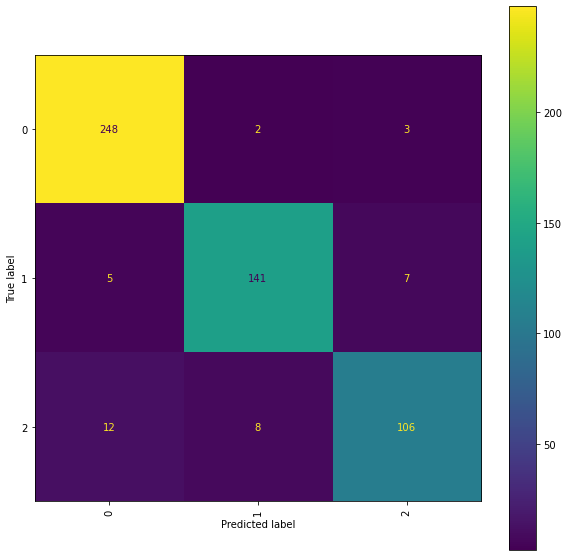

In [10]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

display = ConfusionMatrixDisplay.from_predictions(y_test,predicciones,display_labels = modelo.classes_,colorbar = False,cmap = 'Greens')


#### Clasification Report

In [11]:
from sklearn.metrics import classification_report

reporte_clasificacion = classification_report(y_test, predicciones)

print(reporte_clasificacion)

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       253
           2       0.93      0.92      0.93       153
           x       0.91      0.84      0.88       126

    accuracy                           0.93       532
   macro avg       0.93      0.91      0.92       532
weighted avg       0.93      0.93      0.93       532

